In [3]:
%pip install -U vnstock

Note: you may need to restart the kernel to use updated packages.


In [12]:
from vnstock import Vnstock

stocks = ['TCB', 'PDR', 'VIX']

for stock_name in stocks:
    # Khởi tạo đối tượng stock với mã 'TCB' và nguồn dữ liệu 'VCI'
    stock = Vnstock().stock(symbol=stock_name, source='VCI')

    # Lấy dữ liệu lịch sử giá cổ phiếu trong 1 năm qua
    df = stock.quote.history(start='2024-01-01', end='2025-11-18', interval='1D')

    # Save to csv file 
    df.to_csv(f'../data/{stock_name}.csv')

In [5]:
df.tail(5)

,time,open,high,low,close,volume
489,2025-11-12,21.20,22.20,21.10,22.20,9427000
490,2025-11-13,22.10,22.10,21.65,22.00,5694500
491,2025-11-14,21.75,22.50,21.75,22.20,7091000
492,2025-11-17,22.35,23.25,22.25,23.05,14150500
493,2025-11-18,23.10,23.35,22.80,23.00,7818600


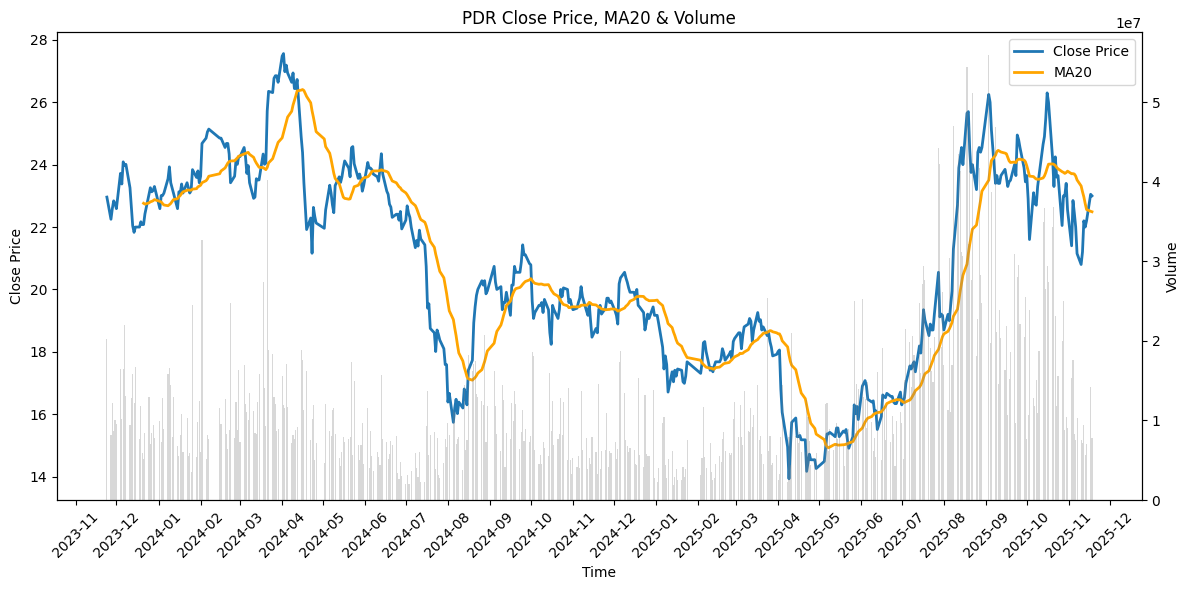

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


def plot_charts(stock):
    df = pd.read_csv(f"../data/{stock}.csv")
    df['time'] = pd.to_datetime(df['time'])

    # --- Tính MA20 ---
    df['MA20'] = df['close'].rolling(window=20).mean()

    fig, ax1 = plt.subplots(figsize=(12,6))

    # --- Close price line (Y1) ---
    ax1.plot(df["time"], df["close"], linewidth=2, label="Close Price")
    ax1.plot(df["time"], df["MA20"], linewidth=2, color='orange', label="MA20")  # MA20 line
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Close Price")
    ax1.set_title(f"{stock} Close Price, MA20 & Volume")
    ax1.legend()
    # set display monthly
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.tick_params(axis="x", rotation=45)

    # --- Volume bar (Y2) ---
    ax2 = ax1.twinx()  # tạo trục Y thứ 2 chung trục X
    ax2.bar(df["time"], df["volume"], alpha=0.3, color='gray')
    ax2.set_ylabel("Volume")

    plt.tight_layout()
    plt.show()

plot_charts('PDR')


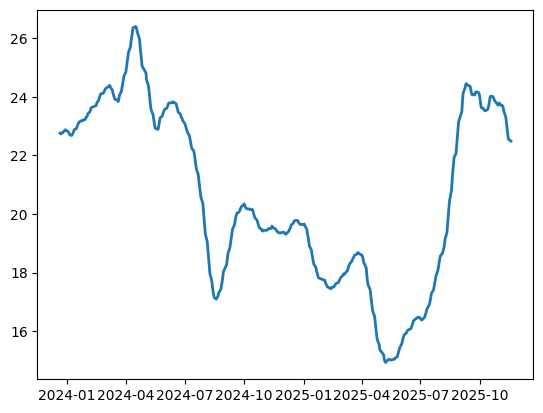

In [7]:
# Moving average plot 
df["MA20"] = df["close"].rolling(window=20).mean()
plt.plot(df.time, df.MA20, linewidth = 2)
